Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/sample_data/housing.csv')

In [29]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [30]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

EDA


<ipython-input-31-733fd363c0e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'])


<Axes: xlabel='MEDV', ylabel='Density'>

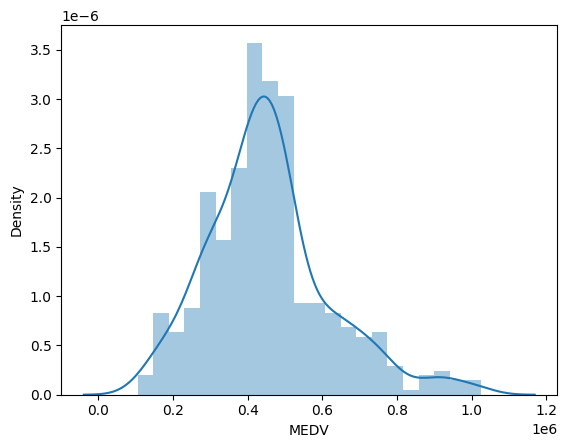

In [31]:
sns.distplot(df['MEDV'])

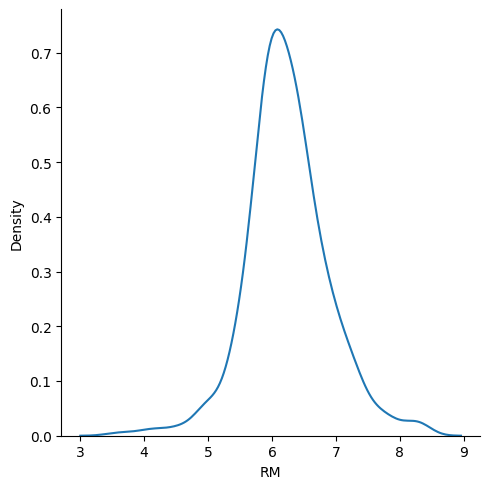

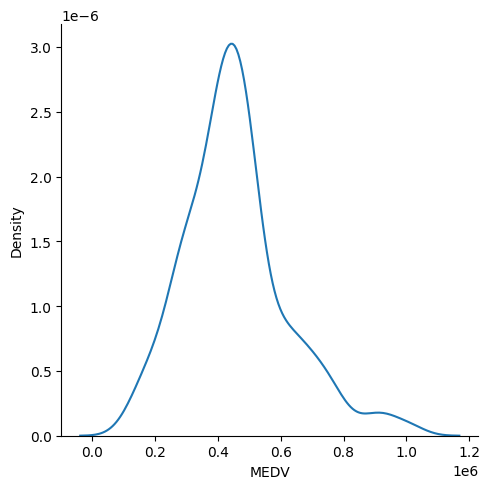

In [32]:
sns.displot(data=df, x='RM', kind='kde')
sns.displot(data=df, x='MEDV', kind='kde')

<Axes: >

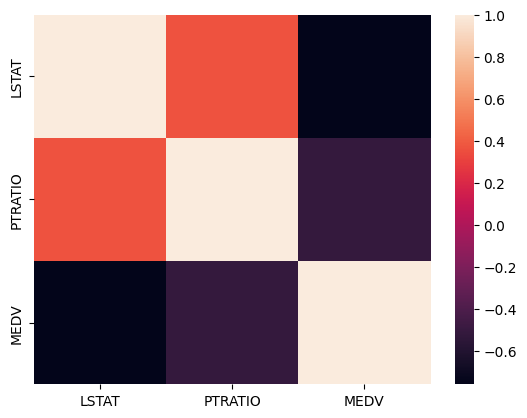

In [33]:
sns.heatmap(df.iloc[:,1:].corr())

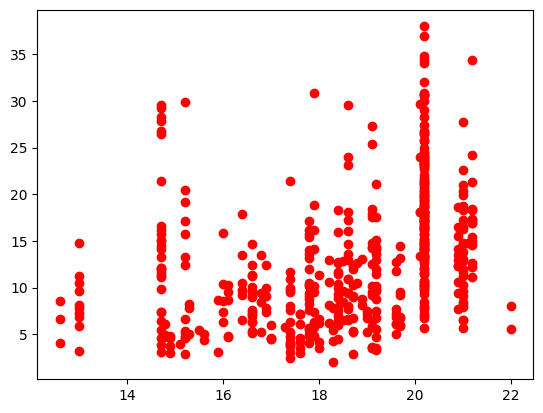

In [34]:
plt.scatter(df.PTRATIO,df.LSTAT,color='red')

<Axes: xlabel='LSTAT'>

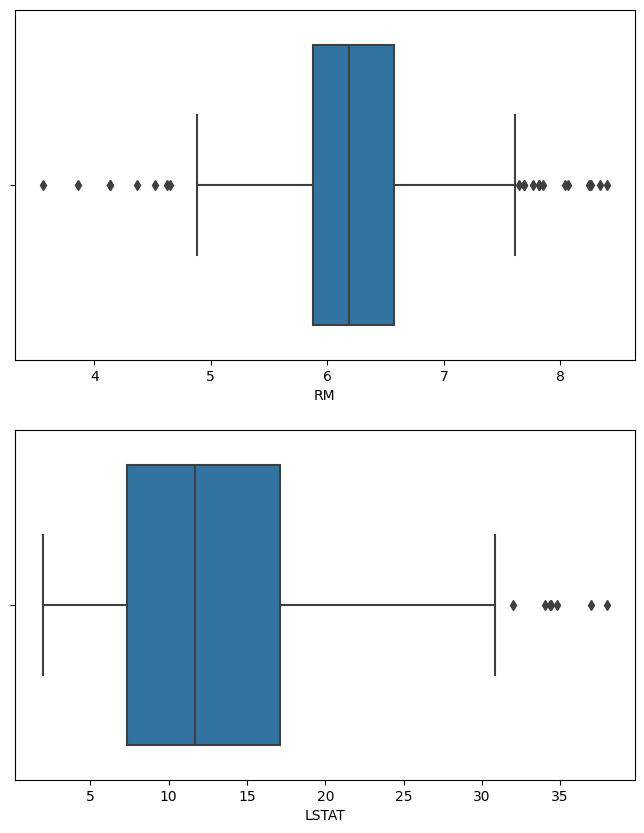

In [35]:

plt.figure(1, (8, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='RM')
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='LSTAT')

For RM OUTLIERS

In [36]:

Q1, Q3 = np.percentile(df['RM'], [25, 75])
print(f"Q1 is {Q1} || and Q3 is {Q3}")
IQR = Q3 - Q1
print(f"IQR is : {IQR}")
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(f"Lower Limit is {lower_limit} and Upper Limit is {upper_limit}")

Q1 is 5.88 || and Q3 is 6.575
IQR is : 0.6950000000000003
Lower Limit is 4.8374999999999995 and Upper Limit is 7.617500000000001


In [37]:
outliers_rm = [outlier for outlier in df['RM'] if outlier > upper_limit or outlier < lower_limit]
print(f"Outliers in RM column are {outliers_rm}")

Outliers in RM column are [8.069, 7.82, 7.765, 7.853, 8.266, 8.04, 7.686, 8.337, 8.247, 8.259, 8.398, 7.691, 7.82, 7.645, 3.561, 3.863, 4.138, 4.368, 4.652, 4.138, 4.628, 4.519]


In [38]:


df['RM'] = np.where(df['RM'] > upper_limit, upper_limit, np.where(df['RM'] < lower_limit, lower_limit, df['RM']))

<Axes: xlabel='RM'>

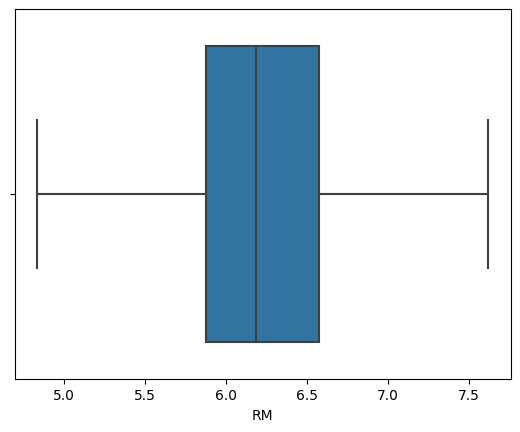

In [39]:
sns.boxplot(data=df, x='RM')

For LSTAT Outliers

In [40]:

Q1, Q3 = np.percentile(df['LSTAT'], [25, 75])
print(f"Q1 is {Q1} || and Q3 is {Q3}")
IQR = Q3 - Q1
print(f"IQR is : {IQR}")
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(f"Lower Limit is {lower_limit} and Upper Limit is {upper_limit}")
     

Q1 is 7.37 || and Q3 is 17.12
IQR is : 9.75
Lower Limit is -7.255 and Upper Limit is 31.745


In [41]:

outliers_rm = [outlier for outlier in df['LSTAT'] if outlier > upper_limit or outlier < lower_limit]
print(f"Outliers in lstat column are {outliers_rm}")


Outliers in lstat column are [34.41, 34.77, 37.97, 31.99, 34.37, 36.98, 34.02]


In [42]:

df['LSTAT'] = np.where(df['LSTAT'] > upper_limit, upper_limit, np.where(df['LSTAT'] < lower_limit, lower_limit, df['LSTAT']))

<Axes: xlabel='LSTAT'>

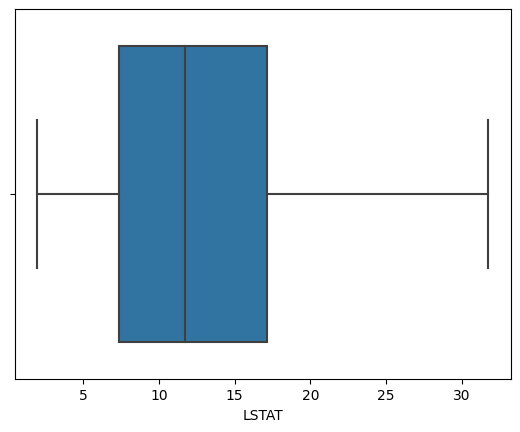

In [52]:
sns.boxplot(data=df, x='LSTAT')

In [53]:

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns=['LSTAT', 'RM'])
y = df['MEDV']

In [54]:
x

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
484,9.67,6.593
485,9.08,6.120
486,5.64,6.976
487,6.48,6.794


In [55]:
y

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

Training And Testing Model
Linear Regression

In [44]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [45]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [46]:
from sklearn.linear_model import LinearRegression
     


     

In [47]:
lr = LinearRegression()
     



In [48]:
lr.fit(x_train, y_train)

LinearRegression()

In [49]:

prediction = lr.predict(x_test)

In [50]:

prediction
     

array([323140.71538776, 375127.81326929, 511398.41149584, 563448.16738777,
       404339.38387954, 537073.42537929, 422993.39691701, 418105.06486176,
       672723.12915034, 630734.5818944 , 561282.72929129, 569168.73501084,
       657857.63439746, 275495.6988197 , 610140.66837874, 467957.69105669,
       596595.37821888, 284326.31358445, 491039.01983559, 569890.14818623,
       429596.15730509, 599259.50700064, 259518.33911992, 484165.97690088,
       467379.38611907, 489528.44407068, 153881.89310458, 365352.88658174,
       350964.57372107, 425420.43044539, 551648.93168835,  96967.94274061,
       700776.41793533, 465502.02278617, 457059.39717935, 334802.77022816,
       639300.24724647, 535452.14808705, 374712.56419684, 337196.50567891,
       201132.21255314, 473122.95822794, 566901.28250175, 621441.63138039,
       464342.05893015, 347674.21734987, 681298.59205882, 584287.20355381,
       422175.47872025, 382831.11261866, 328130.58847592, 471527.67680696,
       467085.92282936, 4

In [51]:

predictionDec = {"y_test":y_test, "prediction":prediction}
predictionData = pd.DataFrame(predictionDec)
predictionData
     

,y_test,prediction
237,388500.0,323140.715388
440,283500.0,375127.813269
75,449400.0,511398.411496
230,497700.0,563448.167388
351,436800.0,404339.383880
...,...,...
176,835800.0,660314.831097
466,457800.0,440878.547507
122,430500.0,365004.067488
401,184800.0,330399.536678


Model Evaluation

In [56]:


from sklearn.metrics import mean_squared_error, r2_score


Evaluation on training Data

In [58]:

predictionTrain = lr.predict(x_train)
     

mse = np.sqrt(mean_squared_error(y_train, predictionTrain))
     

r2Score = r2_score(y_train, predictionTrain)


print(f"RMSE is {mse} and R2 score is {r2Score}")


RMSE is 94227.11988729748 and R2 score is 0.6662062995355627


Evaluation on Testing Data

In [59]:


predictionTest = lr.predict(x_test)
     

mse = np.sqrt(mean_squared_error(y_test, predictionTest))
     

r2Score = r2_score(y_test, predictionTest)

print(f"RMSE is {mse} and R2 score is {r2Score}")
     

RMSE is 95929.97176019658 and R2 score is 0.6931638690261672


Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(x_train, y_train)


DecisionTreeRegressor(random_state=5)

In [62]:
# Predicting the PROFIT for the Test values
y_prediction = dtr.predict(x_test)
print(y_prediction)

[245700. 365400. 491400. 611100. 424200. 468300. 245700. 323400. 701400.
 760200. 525000. 611100. 665700. 289800. 588000. 487200. 693000. 455700.
 430500. 611100. 426300. 478800. 174300. 432600. 396900. 499800. 327600.
 281400. 340200. 510300. 569100. 184800. 888300. 487200. 315000. 459900.
 695100. 611100. 415800. 275100. 176400. 499800. 489300. 495600. 504000.
 151200. 739200. 501900. 510300. 405300. 275100. 396900. 396900. 415800.
 665700. 279300. 491400. 898800. 953400. 396900. 409500. 422100. 430500.
 401100. 422100. 569100. 455700. 218400. 367500. 420000. 457800. 525000.
 495600. 415800. 497700. 760200. 405300. 491400. 462000. 365400. 434700.
 556500. 289800. 321300. 617400. 655200. 504000. 388500. 411600. 468300.
 340200. 468300. 218400. 905100. 388500. 451500. 315000. 426300.]


In [63]:
predictionDec = {"y_test":y_test, "prediction":y_prediction}
predictionData = pd.DataFrame(predictionDec)
predictionData

,y_test,prediction
237,388500.0,245700.0
440,283500.0,365400.0
75,449400.0,491400.0
230,497700.0,611100.0
351,436800.0,424200.0
...,...,...
176,835800.0,905100.0
466,457800.0,388500.0
122,430500.0,451500.0
401,184800.0,315000.0


In [64]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_prediction)
mse = np.sqrt(mean_squared_error(y_test, y_prediction))


In [65]:
r2

0.6646865419949252

In [66]:
mse

100282.82504995559